![](../docs/banner.png)

# L4: Manipulacje zbiorami danych

``` {important}
Termin oddania zadania 4 został wydłużony o tydzień.  
Nowe terminy  
TN: 3.05.2021  
TP: 10.05.2021  
```


## Efekty kształcenia laboratorium
<hr>

- poznasz podstawowe bibliteki służące do przetwarzania różnego rodzaju danych
- poznasz jakie są podstawowymi narzędziami do przetwarzania tekstu
- poznasz jak obliczyć prostą reprezentację wektorową tekstu
- poznasz jak interpretować predykcje modelu

## Podstawowe narzędzia do przetwarzania danych

| Typ danych | Biblioteka | Repozytorium | Zbiory danych | Przetwarzanie wstępne | Modele/Algorytmy | Ewaluacja |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Tekst | nltk | [LINK](https://github.com/nltk/nltk) | $\surd$ | $\surd$ |  $\surd$ | $\surd$ |
| | spacy | [LINK](https://github.com/explosion/spaCy) | $\times$ | $\surd$ |$\surd$| $\surd$|
| | transformers | [LINK](https://github.com/huggingface/transformers) |  $\times$ | $\times$ |$\surd$|$\times$|
| | datasets | [LINK](https://github.com/huggingface/datasets) |  $\surd$ | $\times$ |$\times$|$\times$|
| | torchtext | [LINK](https://github.com/pytorch/text) |  $\surd$ | $\surd$ |$\times$|$\times$|
| Obrazy | torchvision |  [LINK](https://github.com/pytorch/vision) | $\surd$ | $\surd$ |$\surd$|$\times$ |
| | opencv | [LINK](https://github.com/opencv/opencv) | $\surd$ | $\surd$ |$\surd$|$\surd$ |
| | turicreate | [LINK](https://github.com/apple/turicreate) | $\surd$ | $\surd$ |$\surd$|$\surd$ |
| Grafy | networkx | [LINK](https://github.com/networkx/networkx) | $\surd$ | $\surd$ |$\surd$|$\surd$  |
| | graphtool | [LINK](https://github.com/antmd/graph-tool) | $\surd$ | $\surd$ |$\surd$|$\surd$  |
| | ogb | [LINK](https://github.com/snap-stanford/ogb) | $\surd$ | $\surd$ |$\times$|$\surd$
| | torch-geometric | [LINK](https://github.com/rusty1s/pytorch_geometric) |  $\surd$ | $\surd$ |$\surd$|$\surd$

## Przetwarzanie tekstów z wykorzystaniem biblioteki spacy

Do przetwarzania tekstów wykorzystamy bibliotekę `spacy`. `Spacy` to darmowa biblioteka o otwartych źródłach dedykowana do pracy z tekstem. Może być wykorzystana zarówno do budowy systemów ekstrakcji informacji, jak i systemów do rozumienia języka naturalnego. Ponadto zawiera zestaw narzędzi do wstępnego przetwarzania tekstów. Spacy udostępnia wsparcie dla ponad 60 języków. 

Moduł spacy udostępnia kilka wcześniej przeuczonych potoków przetwarzania dla języka angielskiego. Ich szczegółowy opis znajduje się pod adresem [LINK](https://spacy.io/models/en). Do dalszego przetwarzania wykorzystamy najmniejszy potok `en_core_web_sm`.

### Instalacja i pobieranie modułów

W ramach podstawowych operacji przetwarzania, będziemy wykorzystywać część biblioteki odpowiadającej za inferencję. Pozostałe komponety wymagają doinstalowania dodatkowych modułów.

Szczegółowy opis znajduję się pod adresem [LINK](https://spacy.io/usage)

Do inferencji potrzebujemy wyłącznie paczki `spacy`, którą możemy zainstalować wykorzystając menadżera paczek pip.

```bash
pip install spacy
```

Teraz zostaje nam pobranie naszego potoku przetwarzania dedykowanego dla języka angielskiego.

```bash
python -m spacy download en_core_web_sm
```

Potok `en_core_web_sm` zawiera takie komponenty jak:  
- [tok2vec](https://spacy.io/api/tok2vec) - Transformacja tokenów w wektory
- [tagger](https://spacy.io/api/tagger) - Tagowanie części mowy
- [parser](https://spacy.io/api/dependencyparser) - Parser zależnościowy
- [senter](https://spacy.io/api/sentencerecognizer) - Rozpoznawanie zdań
- [ner](https://spacy.io/api/entityrecognizer) - Rozpoznawanie nazw własnych
- [attribute_ruler](https://spacy.io/api/attributeruler) - Przypisywanie atrybutów do tokenów
- [lemmatizer](https://spacy.io/api/entityrecognizer) - Sprowadzanie tokenów do nazw własnych



### Wczytanie potoków

Podstawowym obiektem jest [Language](https://spacy.io/api/language). `Language` zawiera m.in. takie elementy jak: Słownik (`vocab`), elementy Potoku przetwrzania np. `tagger`, dane specyficzne dla danego języka takie jak np. stop-słowa (ang. stopwords) czy reguły interpunkcji (ang. punctuation). Obiekt `Language` jest również tworzony podczas ładowania wcześniej przeuczonych potoków przetwrzania za pomocą `spacy.load`. Często definiuje się go pod nazwą `nlp`.

Pobrany moduł wczytujemy z wykorzystaniem wspomnianej funkcji `spacy.load`. Domyślnie wczytuje on wszystkie zdefiniowane komponenty, ale możemy go ograniczyć. Do dalszego przetwarzania wystarczą nam komponenty `tagger`, `tok2vec`, `parser`,  `lemmatizer` i `attribute_ruler`. Pozostałe możemy wykluczyć za pomocą argumentu `exclude`.

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm", exclude=["ner", "senter"])

Następnym kluczowym element jest obiekt [Doc](https://spacy.io/api/doc), który jest sekwencją [Tokenów](https://spacy.io/api/token). `Token` może oznaczać słowo, znak interpukcyjny, białe znaki itp. Obiekt `Doc` ten jest często tworzony za pomocą wywołania funkcji `__call__` obiektu `nlp`, który od razu wykonuje zdefiniowany potok przetwarzania.

In [2]:
doc = nlp("Please stop, don't parse me")

Aby dostać się do wyników przetwarzania odwołujemy się do każdego tokenu z osobna.
W naszym potoku mieliśmy zdefiniowane komponenty jak części mowy attrybut, parser zależnościowy atrybut i lemmatyzację. Aby się do nich dostać odwołamy się kolejne do atrybutów `pos_`, `dep_` i `lemma_`.

In [3]:
token = doc[0]
print(token.text, token.pos_, token.dep_, token.lemma_)

Please INTJ intj please


Wyświetlmy teraz wyniki przetwarzania dla całego tekstu.

In [4]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.lemma_)

Please INTJ intj please
stop VERB parataxis stop
, PUNCT punct ,
do AUX aux do
n't PART neg n't
parse VERB ROOT parse
me PRON dobj I


##  Wektoryzacja tekstów za pomocą modelu TF-IDF

### Rozszerzenie modelu BoW o model TF-IDF 
TF-IDF jest to skrót od ang. Term Frequency – Inverse Document Frequency.  Pierwszą składową modelu jest Term Frequency (TF),  drugim komponentem jest Inverse Document Frequency (odwrotna częstość dokumentów). Możemy zastosować różne metody ważenia dla obu komponentów, jednak w ramach tego zadania wykorzystamy jedynie proste składowe bez dodatkowego ważenia. Składowa TF jest częstością występowania wyrazów, co tak naprawdę jest wyjściem z modelu BoW. Odwrotna częstość dokumentów (IDF) jest obliczana z poniższego wzoru: 

$$
idf(w) = \log{\frac{\text{liczba dokumentow}}{\text{liczba dokumentow zawierajaca slowo w}}}
$$

 
TF-IDF jest iloczynem tych dwóch komponentów co daje finalną postać:   


$$
tfidf(w) = tf(w) * idf(w)
$$

Reprezentacja słów dla dokumentów `D1`i `D2` ` z wykorzystaniem modelu BoW po zastosowaniu dodatkowego ważenia TF-IDF została przedstawiona w poniższej tabeli.

```
D1: Problemem metody tfidf nie jest czas obliczeń.
D2: Problem w tfidf leży w wymiarowości.
```

| w          | TF(w)  | IDF(w) | TFIDF(w)  |
|------------|--------|--------|-----------|
| Problemem  | 1      | 0.69   | 0.69      |
| metody     | 1      | 0.69   | 0.69      |
| tfidf      | 2      | 0      | 0         |
| nie        | 1      | 0.69   | 0.69      |
| jest       | 1      | 0.69   | 0.69      |
| czas       | 1      | 0.69   | 0.69      |
| obliczeń   | 1      | 0.69   | 0.69      |
| Problem    | 1      | 0.69   | 0.69      |
| w          | 2      | 0.69   | 1.38      |
| leży       | 1      | 0.69   | 0.69      |
| wymiarowości | 1    | 0.69   | 0.69      |

**Tabela. Reprezentacja słów po zastosowaniu ważenia TF-IDF**
 
W rezultacie stosując otrzymaną reprezentację słów wektory cech dokumentów **D1**,**D2**, będą miały następującą postać:   
`D1 = [0.69, 0.69, 0,   0.69,  0.69, 0.69, 0.69, 0,    0,    0,    0   ]`  
`D2 = [0,    0,    0,   0,     0,    0,    0,    0.69, 1.38, 0.69, 0.69]`    

**Kolumny w wektorach cech** oznaczają reprezentacje poszczególnych wyrazów zgodnie ze słownikiem utworzonym wcześniej czyli: `'Problemem', 'metody', 'tfidf', 'nie', 'jest', 'czas', 'obliczeń', 'Problem', 'w', 'leży' 'wymiarowości'`
 
``` {important}
Reprezentację słów tworzymy tylko podczas fazy uczenia wykorzystując zbiór uczący. Podczas fazy testowania wykorzystujemy reprezentację obliczoną wcześniej przekształcając dokumenty ze zbioru testowego. Jeżeli zdarzy się taka sytuacja że słowo ze zbioru testowego nie znajduje się w słowniku to w takim przypadku jest ono pomijane.
```


``` {hint}
Do obliczenia reprezentacji TF-IDF można wykorzystać moduł [sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
```


``` {important} 
Formuła liczenia TF-DF z pakietu `sklearn.feature_extraction.text.TfidfVectorizer` jest inna niż w przedstawionym wzorze. Szczegóły znajdują się w dokumentacji [LINK](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer).
```

## Interpretacja modeli z wykorzystaniem biblioteki SHAP

`SHAP` (SHapley Additive exPlanations) jest podejściem opartym na teorii gier, służącym do interpretacji wyników dowolnego modelu uczenia maszynowego. Szczegóły dotyczące implementacji można znaleźć w oryginalnym artykule autorów [LINK](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf). Istotność danej cechy jest wyrażone w postaci metryki `Shap Value`.

Shap wspiera modele oparte o drzewa decyzyjne, sieci neuronowe oraz obsługuje też inne metody nie wpadające w te dwie grupy kosztem czasu obliczeń.

Dostępne obecnie moduły:
- Drzewa decyzyjne - `TreeExplainer`
- Sieci Neuronowe - `DeepExplainer`, `GradientExplainer`
- Inne modele `LinearExplainer`, `KernelExplainer` (wolniejsze od innych podejść)

W ramach tego laboratorium skupimy się na wyjaśnianiu podejść bazujących o drzewa decyzyjnie, a konkretnie o algorytm [XGBoost](https://github.com/dmlc/xgboost).

### Instalacja

Zacznijmy od instalacji potrzebnych bibliotek

```
pip install shap
pip install xgboost==1.3.3
```

Następnym krokiem jest wyuczenie modelu XGBooost, do analizy wykorzystamy wcześniej poznany zbiór `Boston House Pricing`. Wykorzystamy loader dostarczony przez bibliotekę shap. Przypomnijmy najpierw co oznaczają dane cechy w tym zbiorze danych. 

| Atrybut | Opis 
| --- | --- |
| CRIM |  wskaźnik przestępczości na jednego mieszkańca w poszczególnych miastach|
| ZN | udział terenów mieszkaniowych przeznaczonych pod działki powyżej 25.000 mkw. |
| INDUS | udział powierzchni pod działalność niedetaliczną w poszczególnych miastach |
| CHAS | cecha przyjmuje wartość 1 jeżeli obszar przecina rzekę Charlser, 0 w innym wypadku |
| NOX | stężenie tlenków azotu (części na 10 milionów) |
| RM | średnia liczba pokoi w mieszkaniu |
| AGE | odsetek jednostek okupowanych przez właścicieli zbudowanych przed 1940 rokiem |
| DIS | odległości ważone do pięciu ośrodków zatrudnienia w Bostonie | 
| RAD | wskaźnik dostępności do autostrad prowadzących do centrum miasta | 
| TAX | pełnowartościowa stawka podatku od nieruchomości na 10000 USD | 
| PTRATIO | stosunek liczby uczniów do liczby nauczycieli w poszczególnych miastach | 
| B       | 1000 (Bk - 0,63) ^ 2 gdzie Bk to odsetek Afroamerykanów w mieście |
| LSTAT | % niższy status populacji |
| Cecha wyjściowa (MEDVAL) | Mediana wartości domów zamieszkanych przez właścicieli w tys. dolarów |


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

In [6]:
import xgboost
import shap

X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

Przeliczmy teraz wpływ cech na predykcję

In [7]:
shap.initjs()  # Inicjalizacja obsługi wizualizacji opartych na JavaScript w notebooku
explainer = shap.TreeExplainer(model)  # Inicjalizacja modułu dla konkretnego modelu
shap_values = explainer(X)  # Obliczenie wartości shap

Shap umożliwia analizę wyników per daną próbką, lub w podsumowaniu. Zacznijmy od przedtsawienia analiz per próbka danych. Do tego wykorzystamy wykresy `waterfall` i `force`. Wykres `waterfall` jest renderowany za pomocą matplotliba, dzięki czemu możemy w łatwy sposób modyfikować wykres.

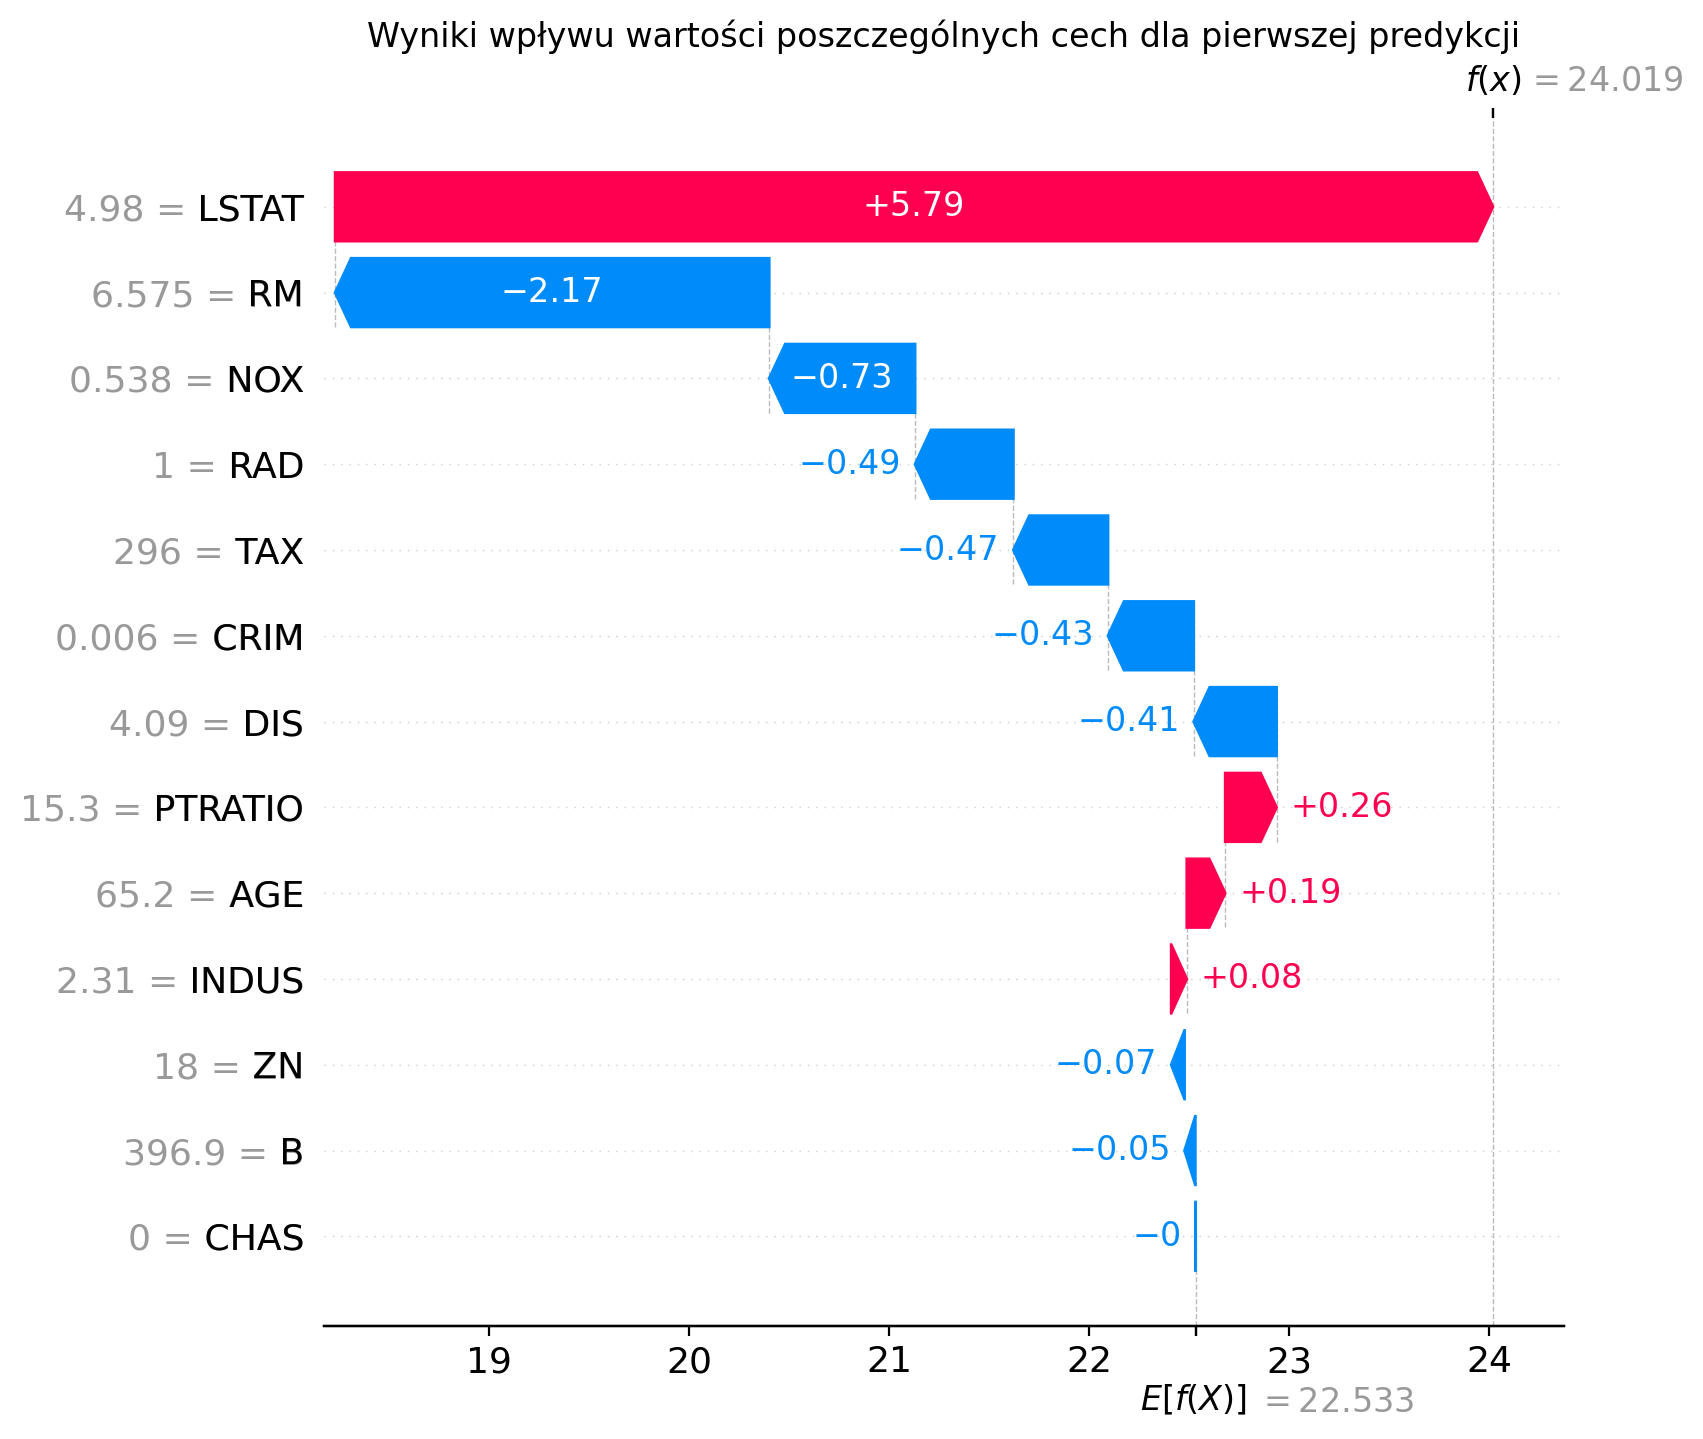

In [8]:
shap.plots.waterfall(shap_values[0], max_display=15, show=False)
fig = plt.gcf()
ax = fig.axes
ax[0].set_title(
    'Wyniki wpływu wartości poszczególnych cech dla pierwszej predykcji'
)
plt.show()

Wartości zaznaczono na czerwono oznaczają cechy które podnosiły wartość predykcji, a na niebiesko te, które obniżały. W lewej kolumnie umieszczono cechy i ich wartości. Liczbę wyświetlanych cech regulujemy parametrem `max_display`. $f(x)$ oznacza wartość predykcji, a $E[f(X)]$ umieszczona pod osią X oznacza uśrednione wyjśćie modelu dla zadanego zbioru, które w tym przypadku wynosi 22.533.



Innym sposobem na przedstawieniem wyników z pojedynczego przypadku jest wykres `force`. Tu w przeciwieństwie do wykresów `waterfall` jest renderowany za pomocą JavaScriptu, ale również możemy wykorzystać interfejs matplotlib przekazując odpowiednią wartość dla flagi `matplotlib`.

In [9]:
shap.plots.force(shap_values[0], matplotlib=False)

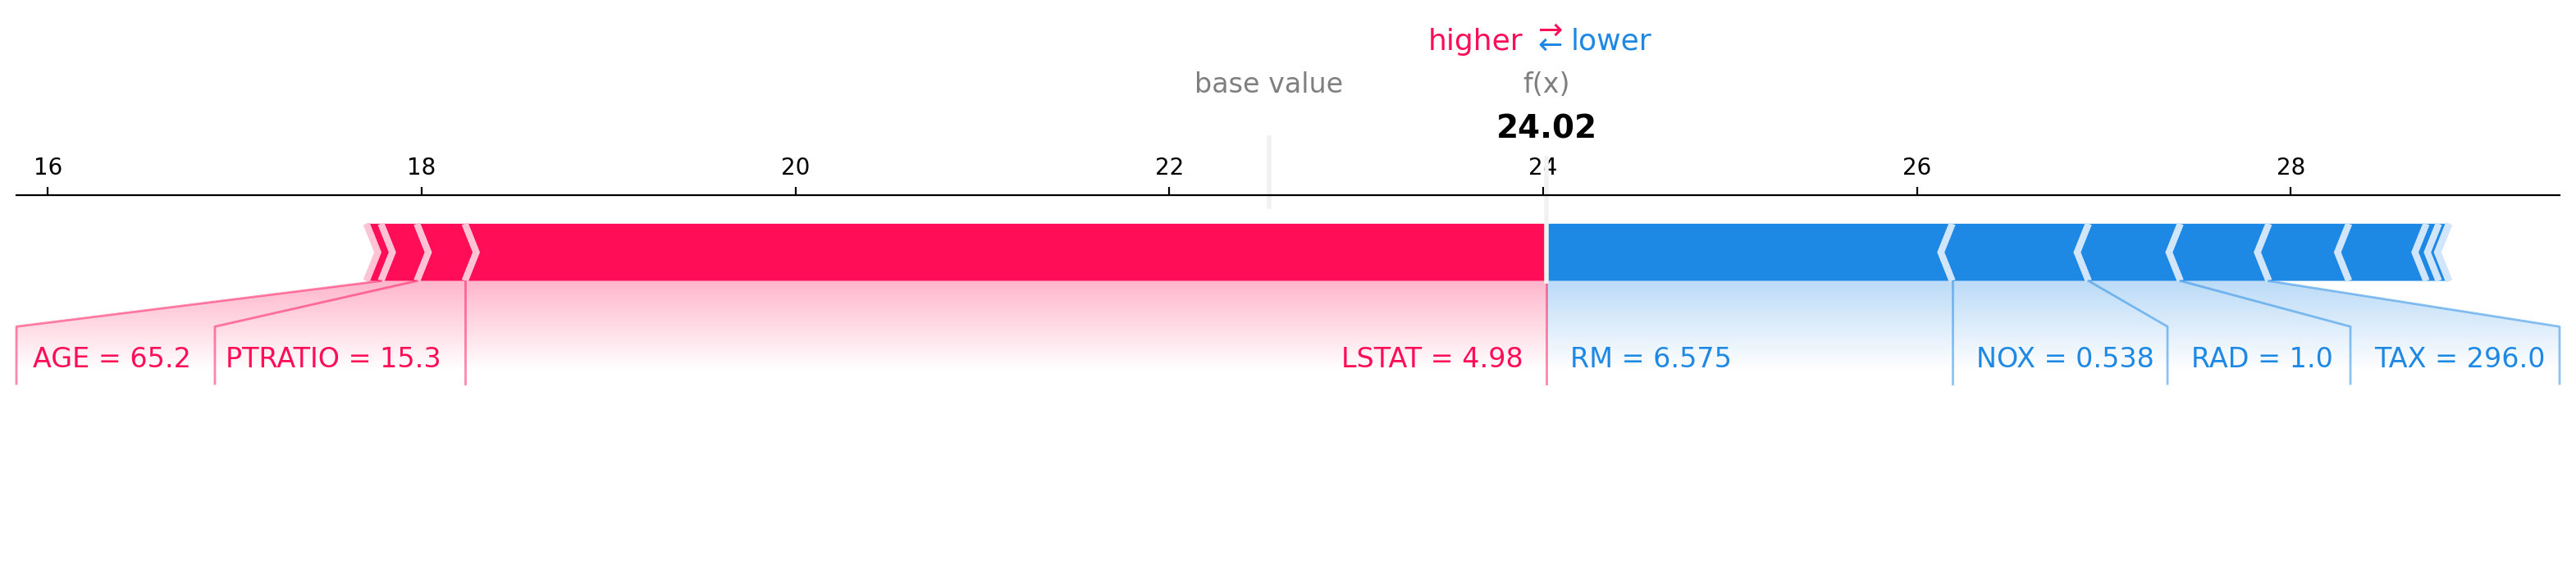

In [10]:
shap.plots.force(shap_values[0], matplotlib=True)

W przypadku wykresu `force` podawana wcześniej wartość  `$E[f(X)]$` jest oznaczona jako `base value`. Wartości cech są tutaj oznaczone jako poszczególne etykiety słupków. W porównaniu do poprzedniego wykresu tutaj nie widzimy dokładnych wartości, tylko określa je długość danego słupka.

W przypadku tego wykresu możemy również otrzymać objaśnienia dla wielu zmiennych, a można tego dokonać obracając wykres o 90 stopni. Taka funkcjonalność jest już dostępna w bibliotece wystarczy przekazać listę jako parametr. W celu poprawnego wyświetlenia wykresu oprócz przekazania wartości shap musimy podać wartości cech jak i ich nazwy.

In [11]:
shap.plots.force(
    base_value=explainer.expected_value, 
    shap_values=shap_values.values, 
    features=X, 
    feature_names=X.columns
)

Wykres jest w pełni renderowany przez JavaScript i daje on nam wiele nowych możliwości. Możemy również zmienić kolejność wyświetlania próbek, jak i zbadać zależności pomiędzy różnymi zmiennymi. 

Jednak nie musimy renderować całego wykresu `force`, żeby zbadać te zależności, ponieważ przy dużej liczbie próbek proces jego renderowania będzie długi jak i również może dojść do ograniczenia responsywności. Aby tego dokonać wykorzystamy funkcję `scatter`.

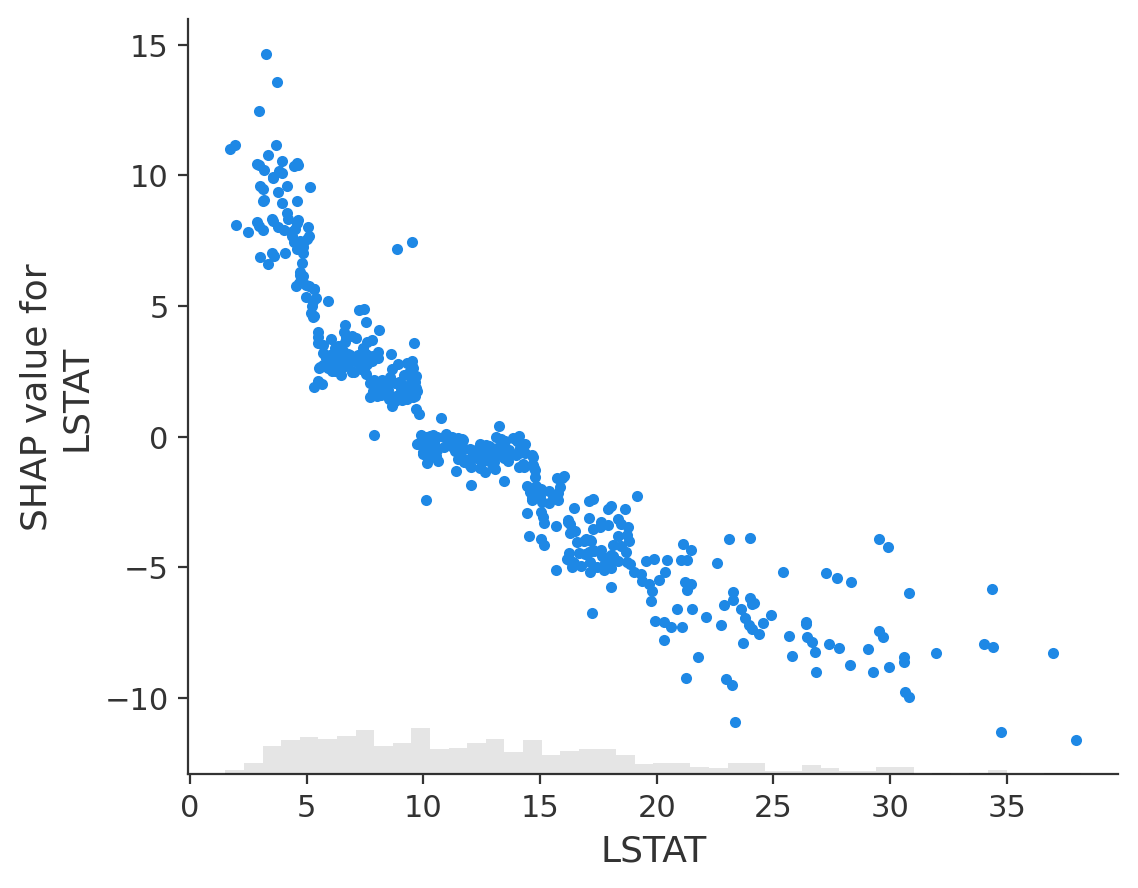

In [12]:
shap.plots.scatter(shap_values[:,"LSTAT"])

Ostatnią grupę wykresów pełnią wykresy podsumowujące wszystkie predykcje do tego służą wykresy `beeswarm` i `bar`

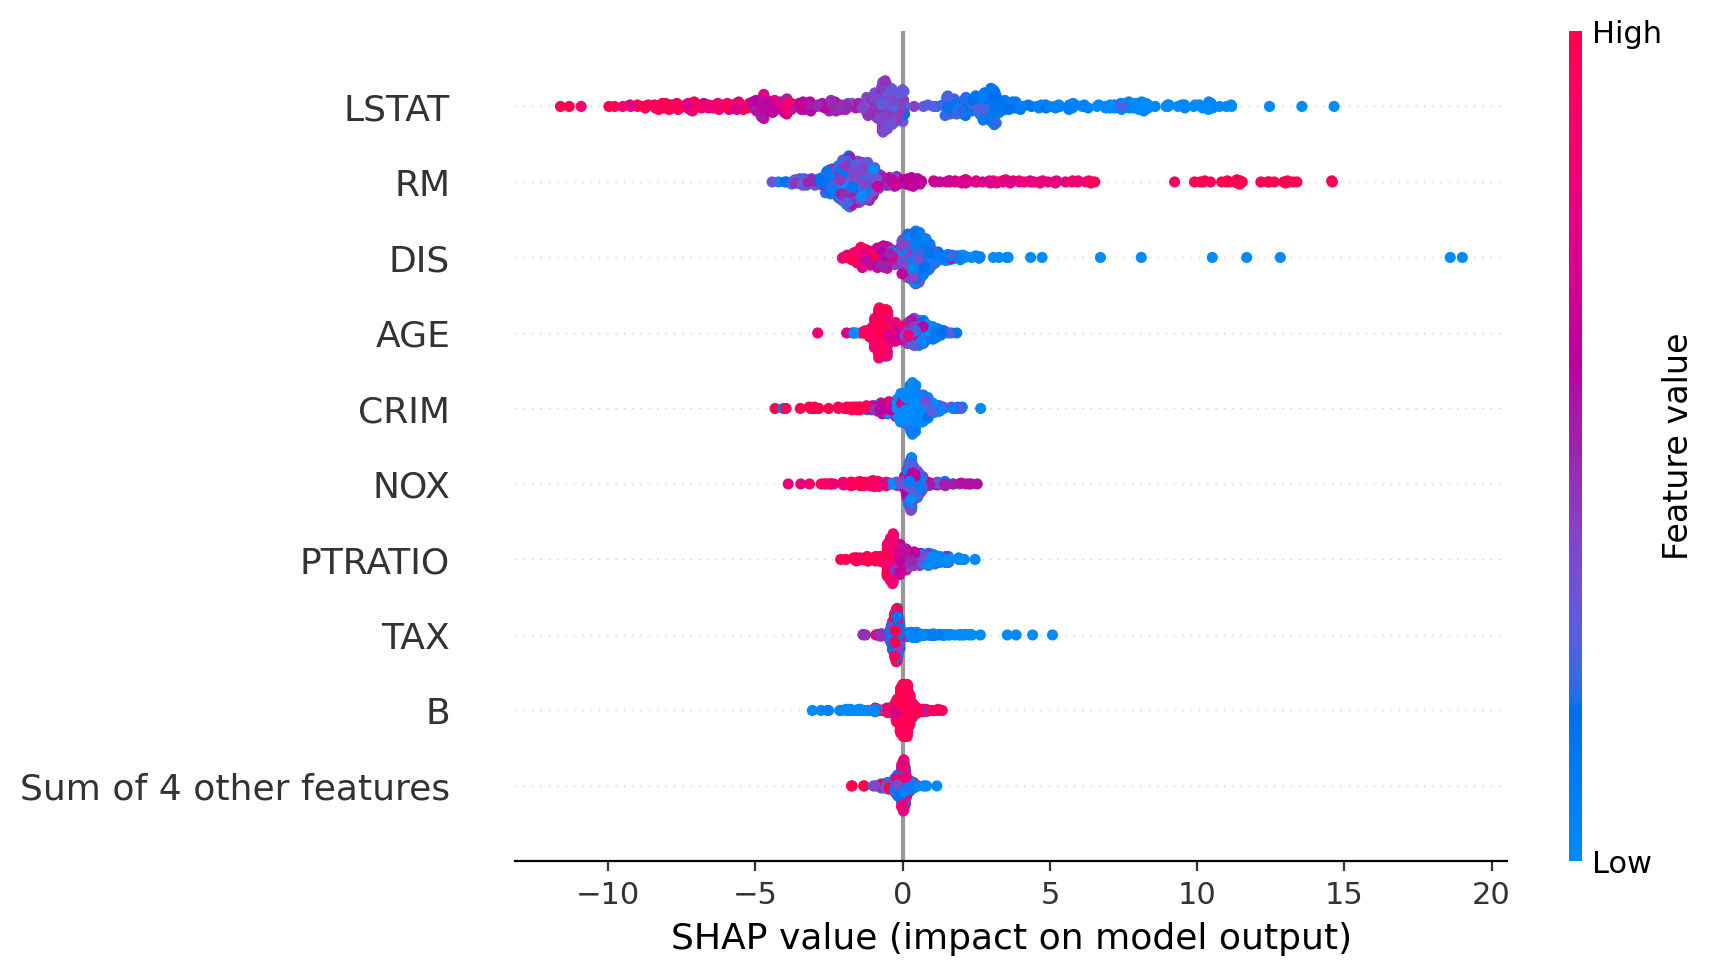

In [13]:
shap.plots.beeswarm(shap_values)

Na podstawie analizy możemy zinterpretować zależności badanych cech na wysokość predykcji, dzięki czemu możemy wyróżnić dwie grupy:
- Cechy wpływające w dużym stopniu na obniżenie wartości predykcji:
    - Wysoka procentowa wartość populacji o niższym statusie `LSTAT`
    - Niska średnia liczba pokoi `RM`
    - Wysoki współczynnik przestępstw `CRIM`
    - Wysokie stężenie tlenką azotów `NOX`
  
- Cechy wpływające w dużym stopniu na podwyższenie wartości predykcji:
    - Niska procentowa wartość populacji o niższym statusie `LSTAT`
    - Niski stawka podatkowa `TAX`
    - Wysoka średnia liczba pokoi `RM`

Ostatnim wykresem jest wykres `bar` który pokazuję średnią wartość zbadanej istotności `SHAP value` dla danej cechy.

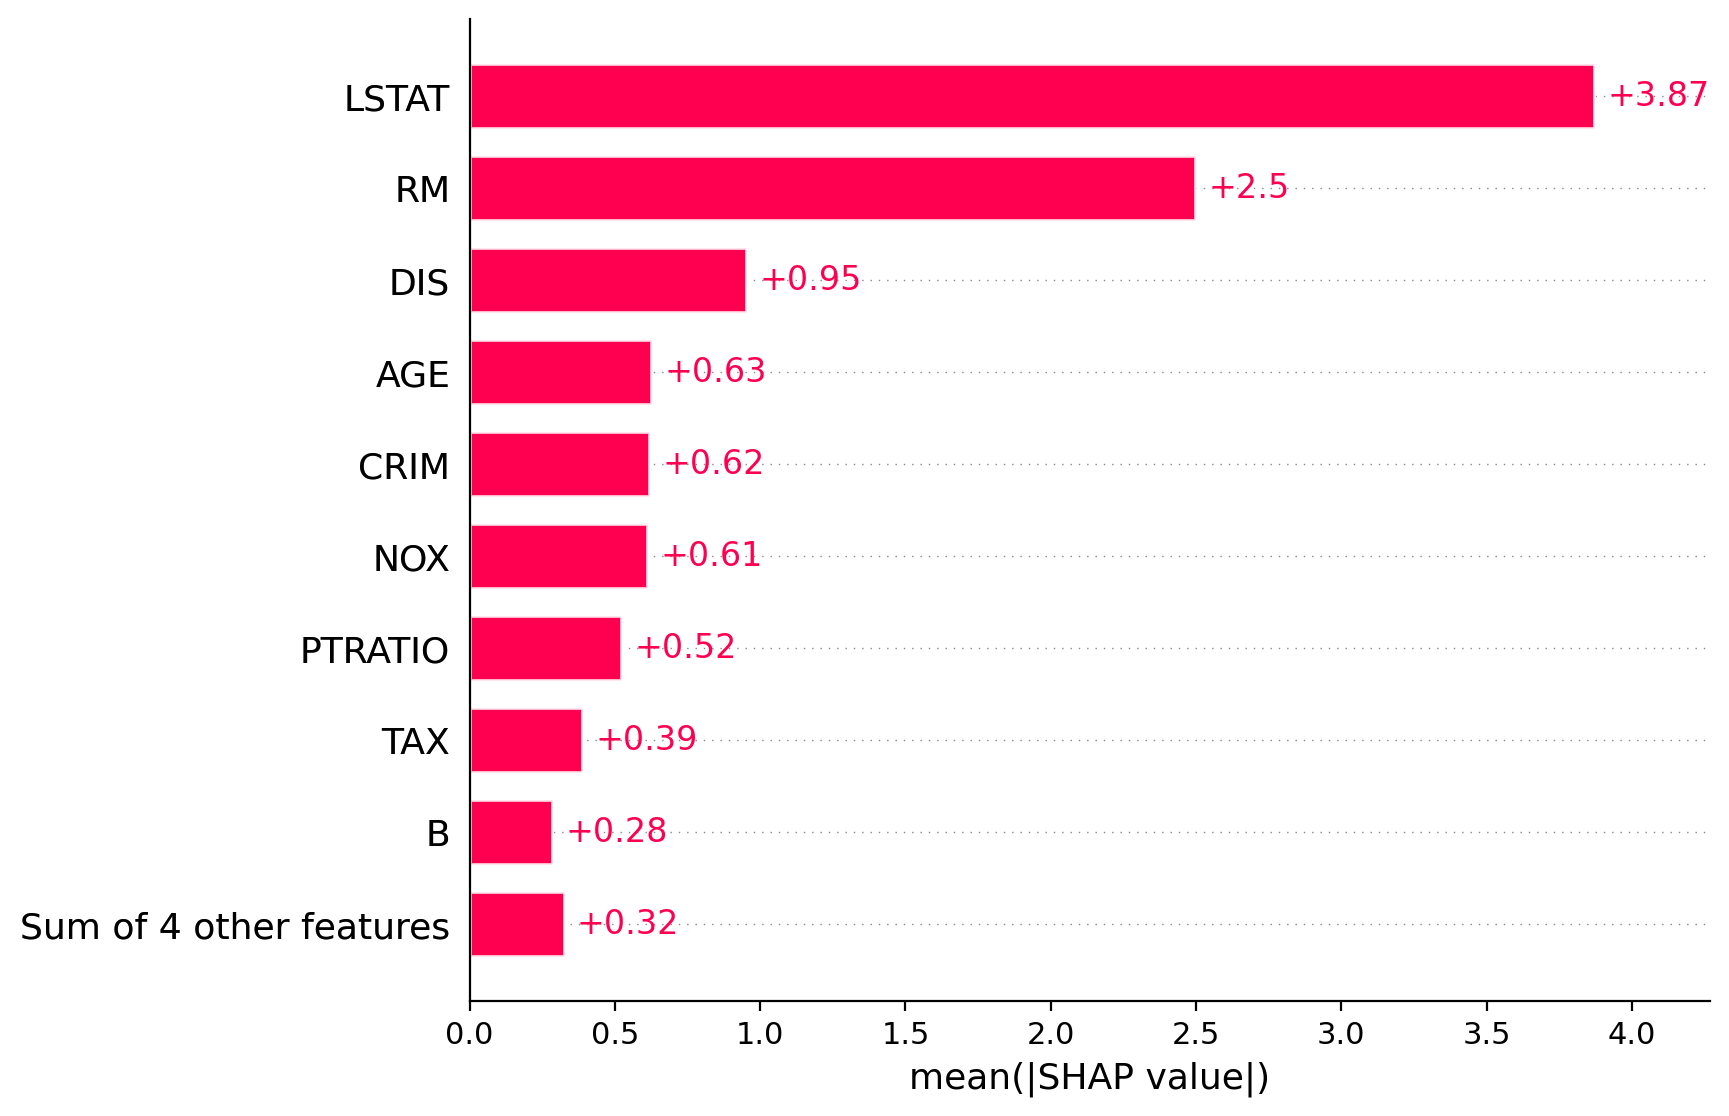

In [14]:
shap.plots.bar(shap_values)